In [1]:
import pandas as pd
import numpy as np
import sidetable as sdt
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("../data/02-tiburon_4.csv", index_col = 0)
df.head(2)

,year,type,country,activity,age,species,month,fatal,gender
0,2018,Boating,usa,Paddling,57.0,White,Jun,N,F
1,2018,Unprovoked,brazil,Swimming,18.0,Tiger,Jun,Y,M


# Pair Programming Limpieza III
​
Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?
Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [3]:
# seleccionamos solo aquellas variables numéricas ya que los outliers solo los tendremos en variable numéricas

df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,year,age
0,2018,57.0
1,2018,18.0


2. Identifica visualmente los outliers

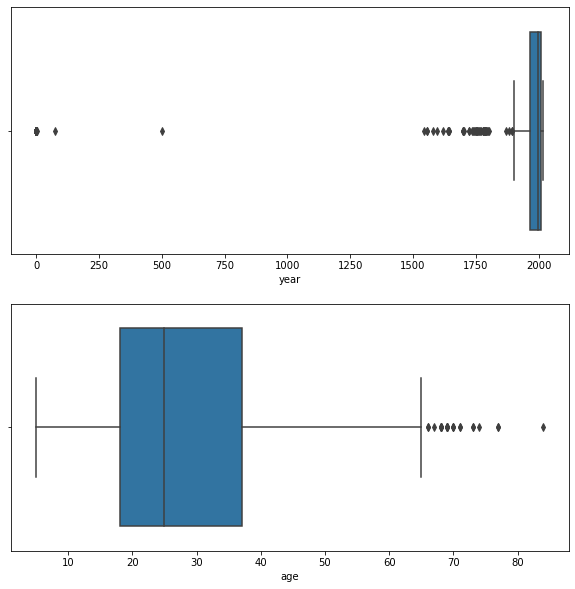

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))#creamos un subplot por cada columna que tenemos arriba
# Iteramos por las columnas del df, para que nos saque el nombre de la columna y dónde se coloca en el subplot
for i, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=df_numericas[columna], data=df_numericas, ax=ax[i])
plt.show()

Vemos que en la columna year hay sobre todo unos outliers que no tienen mucho sentido, ya que son en el año 0, y otros dos antes del 500, y es dificil que haya realmente datos guardados de aquella epoca.
En la columna edad lo que se puede apreciar es que los outliers son de las pocas personas "mayores" que han tenido la mala suerte de que les coja el tiburón

3. Identifica sobre el dataframe las filas que son outliers

Ahora creamos una función para obtener un diccionario con los índices de los outliers y visualizarlos con un DataFrame

In [5]:
# Definimos la función para detectar los outliers
def detectar_outliers(lista_columnas, dataframe):
    # Creamos un diccionario en el que vayamos guardando los indices de los outliers
    dict_indices = {}
    # iteramos por la lista de las columnas
    for col in lista_columnas:
        # sacamos lo cuartiles q1 y q3 y el rango intercuartilico
        q1,q3 = np.nanpercentile(df[col], [25,75])
        IQR = q3-q1
        # Calculamos los límites de los bigotes
        outlier_step = 1.5*IQR
        # Filtramos nuestro DF para identificar los outliers
        outliers_data = dataframe[(dataframe[col] < q1-outlier_step) | (dataframe[col] > q3+outlier_step)]
        # Imprimimos los nombres de columnas donde hay outliers y los dataframes
        print(col)
        display(outliers_data)
        # Comprobamos si el DF tiene alguna fila
        if outliers_data.shape[0] > 0:
            # Si tienes filas es que hay outliers y lo añadimos al diccionario
            dict_indices[col] = (list(outliers_data.index))

    return dict_indices

In [6]:
columnas_numericas = list(df_numericas.columns)
columnas_numericas

['year', 'age']

In [7]:
# Pasamos la función para detectarlos y visualizarlos
indices_outliers = detectar_outliers(columnas_numericas, df)

year


,year,type,country,activity,age,species,month,fatal,gender
1498,1894,Unprovoked,australia,Bathing,19.0,Unspecified,Nov,N,M
1499,1892,Provoked,australia,Fishing,21.0,Unspecified,Mar,N,M
1500,1880,Unprovoked,australia,Swimming,12.0,Bull,Nov,Y,M
1501,1868,Unprovoked,india,Standing,35.0,Unspecified,May,Y,M
1502,1800,Unprovoked,seychelles,a corsair's boat was overturned,NaN,Unspecified,NaN,Y,F
...,...,...,...,...,...,...,...,...,...
1667,0,Unprovoked,australia,Diving,NaN,Unspecified,NaN,Y,M
1668,0,Unprovoked,australia,Pearl diving,NaN,Unspecified,NaN,Y,M
1669,0,Unprovoked,usa,Swimming,NaN,Unspecified,NaN,Y,M
1670,0,Unprovoked,panama,NaN,NaN,Unspecified,NaN,Y,M


age


,year,type,country,activity,age,species,month,fatal,gender
12,2018,Unprovoked,australia,Swimming,69.0,Unspecified,Mar,N,M
30,2017,Unprovoked,usa,SUP,69.0,White,Aug,N,M
51,2016,Provoked,australia,Fishing,73.0,Unspecified,Nov,N,M
80,2016,Unprovoked,new caledonia,Walking,69.0,Tiger,Apr,Y,F
84,2015,Unprovoked,usa,Paddle boarding,71.0,Unspecified,Dec,N,M
121,2015,Unprovoked,usa,Swimming,68.0,Unspecified,Jul,N,M
139,2015,Unprovoked,australia,Surf skiing,71.0,White,Jun,N,M
141,2015,Unprovoked,usa,Spearfishing,70.0,Bull,Apr,N,M
184,2014,Unprovoked,south africa,Swimming,66.0,Unspecified,Mar,Y,M
202,2013,Unprovoked,south africa,Swimming / snorkeling,74.0,White,Oct,Y,M


In [8]:
# Imprimimos la lista de los índices de los outliers
print(indices_outliers)

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 

4. Reemplaza los outliers por el estadístico más correcto.

In [9]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
for k, v in indices_outliers.items():
    # Sacamos la mediana de cada columna numérica
    mediana = df[k].median()
    # iteramos por cada fila de la columna en la que hay outliers y convertimos ese valor en la mediana
    for i in v:
        df.loc[i,k] = mediana

In [10]:
df_numericas2 = df.select_dtypes(include=np.number)
df_numericas2.head(2)

,year,age
0,2018,57.0
1,2018,18.0


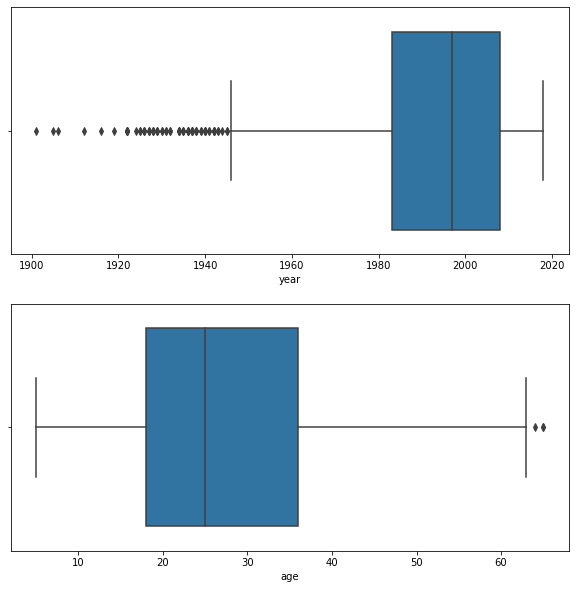

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))#creamos un subplot por cada columna que tenemos arriba
# Iteramos por las columnas del df
for i, columna in enumerate(df_numericas2.columns):
    sns.boxplot(x=df_numericas2[columna], data=df_numericas2, ax=ax[i])
plt.show()

Ahora podemos ver cómo se han modificado los boxplots, con datos más realistas. Los primeros datos que tenemos son del año 1900, más o menos, y respecto a la edad solo tendríamos un par de datos de personas de más de 65 años.

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [12]:
df.to_csv("../data/03-tiburon_4.csv")